In [13]:
# 載入套件
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# 讀取訓練與測試資料
data_path = 'C:\\Users\\Rubio\\AppData\\Roaming\\SPB_16.6\\'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')
df_test = pd.read_csv(data_path + 'house_test.csv.gz')

# 重組資料成為訓練 / 預測用格式
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)
# 合併 DATAFRAME，title 一樣並在同一 column
df = pd.concat([df_train,df_test])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [14]:
df_train.shape

(1460, 79)

In [15]:
df_test.shape

(1459, 79)

In [16]:
df.shape

(2919, 79)

In [17]:
#檢查欄位缺值數量 (去掉.head()可以顯示全部)
df.isnull().sum().sort_values(ascending=False).head()

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
dtype: int64

In [18]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [19]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [20]:
train_num

1460

In [21]:
# 空值補 -1, 做線性迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LinearRegression()
# train_X : 數值型態 DATA，train_Y : SalePrice
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8466400643386489

In [22]:
# 空值補 0
df_0 = df.fillna(0)
train_X = df_0[:train_num]
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8466118155868834

In [23]:
# 空值補平均值
df_mn = df.fillna(df.mean())
train_X = df_mn[:train_num]
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8442642432201215

In [24]:
# 空值補 -1, 搭配最大最小化
df = df.fillna(-1)
df_temp = MinMaxScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8464738883495573

In [25]:
df_temp

array([[0.23529412, 0.21019108, 0.0334198 , ..., 0.        , 0.09090909,
        0.5       ],
       [0.        , 0.25796178, 0.03879502, ..., 0.        , 0.36363636,
        0.25      ],
       [0.23529412, 0.21974522, 0.04650728, ..., 0.        , 0.72727273,
        0.5       ],
       ...,
       [0.        , 0.51273885, 0.08740564, ..., 0.        , 0.72727273,
        0.        ],
       [0.38235294, 0.20063694, 0.04272593, ..., 0.04117647, 0.54545455,
        0.        ],
       [0.23529412, 0.2388535 , 0.03892122, ..., 0.        , 0.90909091,
        0.        ]])

In [26]:
# 搭配標準化
# fit 訓練模型(ex:找到符合資料分布的曲線)Method calculates the parameters μ and σ and saves them as internal objects.
# transform 做標準化等處理
df_temp = StandardScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8466885118649099

In [27]:
df_temp

array([[ 0.06733141,  0.21916199, -0.21787869, ..., -0.08959196,
        -1.55218353,  0.15764553],
       [-0.87361603,  0.66342162, -0.07204408, ..., -0.08959196,
        -0.44692486, -0.60296158],
       [ 0.06733141,  0.30801392,  0.13719688, ..., -0.08959196,
         1.02675338,  0.15764553],
       ...,
       [-0.87361603,  3.03280629,  1.24680804, ..., -0.08959196,
         1.02675338, -1.36356868],
       [ 0.65542357,  0.13031007,  0.0346054 , ...,  1.14431218,
         0.28991426, -1.36356868],
       [ 0.06733141,  0.48571777, -0.06862014, ..., -0.08959196,
         1.7635925 , -1.36356868]])

In [28]:
#必須先用fit_transform(trainData)，之後再transform(testData)
#如果直接transform(testData)，程序會報錯

In [51]:
# Day12
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'C:\\Users\\Rubio\\AppData\\Roaming\\SPB_16.6\\'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [53]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [54]:
# 觀察缺失值
df.isnull().sum()

Pclass      0
Age       263
SibSp       0
Parch       0
Fare        1
dtype: int64

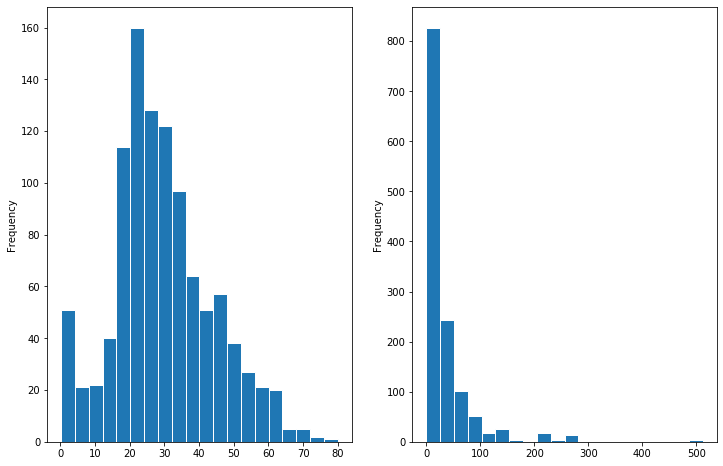

In [62]:
# 用圖表觀察
import matplotlib.pyplot as plt
# 1, 2(share y，即 y 軸單位相同)
fig, ax = plt.subplots(1, 2,figsize=(12, 8))
# 將數字分成 20 組
df['Age'].plot.hist(bins=20, edgecolor='w', ax=ax[0])
df['Fare'].plot.hist(bins=20, edgecolor='w', ax=ax[1])

In [38]:
# 空值補 -1, 做羅吉斯迴歸
# https://read01.com/zzLgj.html#.XmZTU3duJPY 優化算法，目前還無法讀懂(solver='lbfgs')
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6982644788418415

In [39]:
# 空值補 0
df_0 = df.fillna(0)
train_X = df_0[:train_num]
estimator = LogisticRegression(solver='lbfgs') 
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6993817972775958

In [40]:
# 空值補平均值
df_mn = df.fillna(df.mean())
train_X = df_mn[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6959413955734954

In [41]:
# 空值補中間值
df_md = df.fillna(df.median())
train_X = df_md[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970587140092496

In [45]:
# fare補眾數，age補平均數，依照圖片分布
df['Fare'].fillna(df['Fare'].mode(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
train_X = df[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970587140092496

In [46]:
# 用最新的df，搭配最大最小化
df_temp = MinMaxScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.700461240512138

In [47]:
# 搭配標準化
df_temp = StandardScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970587140092496

In [49]:
# 搭配原值
train_X = df[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6970587140092496